# Solemne 2
## Integrantes
- Cristobal Flores Vergara
- Consuelo Flores Perez
- Cristopher Arredondo Canchis

## Introduccion

En este trabajo se busca predecir si un paciente tiene o no riesgo de sufrir un accidente cerebrovascular (stroke) en función de varios factores como edad, hipertensión, enfermedades cardíacas, entre otros.

## Descripcion de los datos

Los datos se encuentran en un archivo CSV llamado `healthcare-dataset-stroke-data.csv` y contienen las siguientes columnas:

1. `id`: Identificador único.
2. `gender`: Género del paciente.
3. `age`: Edad del paciente.
4. `hypertension`: Si el paciente tiene hipertensión.
5. `heart_disease`: Si el paciente tiene enfermedades cardíacas.
6. `ever_married`: Si el paciente está casado.
7. `work_type`: Tipo de trabajo del paciente.
8. `Residence_type`: Tipo de residencia del paciente.
9. `avg_glucose_level`: Nivel promedio de glucosa en sangre.
10. `bmi`: Índice de masa corporal.
11. `smoking_status`: Estado de fumador del paciente.
12. `stroke`: Si el paciente tuvo un accidente cerebrovascular.

## Objetivo

El objetivo de este trabajo es predecir si un paciente tiene riesgo de sufrir un accidente cerebrovascular en función de los factores mencionados anteriormente.

## Metodologia

Para lograr el objetivo propuesto, se seguirá el siguiente plan de trabajo:

1. Cargar los datos.
2. Explorar los datos.
3. Preprocesar los datos.
4. Entrenar un modelo de clasificación.
5. Evaluar el modelo.
6. Realizar predicciones.

A continuación se presenta la implementación de cada uno de estos pasos.


## Configuracion Inicial

In [2]:
# Primero cargamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
# Cargamos el dataset

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Como podemos observar el data set cuenta con 5110 filas y 12 columnas, donde la columna `stroke` es la variable objetivo que queremos predecir.

In [4]:
# Vamos a ver si hay valores nulos en el dataset

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Análisis descriptivo de las variables numéricas
descriptive_stats = df.describe()
print(descriptive_stats)

# Análisis descriptivo de las variables categóricas
categorical_stats = df.describe(include=['O']) # O de object
print(categorical_stats)

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

### Analisis Exploratorio de Datos

#### Analisis de Variables Numericas
- `age`:
    - Media: 43.22, con una desviación estándar de 22.61
    - Mínimo: 0.08
    - Máximo: 82
    - Distribución: La mediana (45 años) cercana a la media sugiere una distribución relativamente simétrica, aunque el rango tan amplio puede incluir outliers (por ejemplo, valores bajos como 0.08 podrían indicar datos mal ingresados o recién nacidos).
- `hypertension`:
    - Esta variable es binaria (0 = sin hipertensión, 1 = con hipertensión).
    - Proporción: Solo el 9.75% de los registros muestran hipertensión, por lo que la mayoría no padece de esta condición.
- `heart_disease`:
    - Esta variable es binaria (0 = sin enfermedades cardíacas, 1 = con enfermedades cardíacas).
    - Proporción: Solo el 5.4% de los registros muestran enfermedades cardíacas, por lo que la mayoría no padece de esta condición.
- `avg_glucose_level`:
    - Media: 106.15, con una desviación estándar de 45.28
    - Mínimo: 55.12
    - Máximo: 271.74
    - Desviación estándar: 45.28, lo que muestra una gran variabilidad en los niveles de glucosa de los individuos.
    - Distribución: La mediana (91.88) es mucho menor que la media, lo que sugiere una distribución asimétrica positiva con valores altos.
- `bmi`:
    - Media: 28.89, con una desviación estándar de 7.85 indicando un valor promedio dentro del rango de sobrepeso.
    - Mínimo: 10.3
    - Máximo: 97.6
    - Distribución: La mediana (28.4) es cercana a la media, lo que sugiere una distribución relativamente simétrica.
    - Valores faltantes: Parece que hay valores faltantes en esta columna (5110 registros en total vs. 4909 registros en BMI), por lo que sería importante decidir cómo manejar estos datos.
- `stroke`:
    - Esta variable es binaria (0 = sin accidente cerebrovascular, 1 = con accidente cerebrovascular).
    - Proporción: Solo el 4.87% de los registros muestran un accidente cerebrovascular, por lo que la mayoría no ha sufrido de esta condición.

#### Analisis de Variables Categoricas

- `gender`:
    - Hay tres categorías en la variable de género, y el más común es “Female”.
- `ever_married`:
    - Hay dos categorías ("Yes, "No") en la variable de estado civil, y el más común es “Yes”.
- 	work_type:
    - Tiene cinco categorías, y el tipo de trabajo más común es “Private” (2925 registros).
- `Residence_type`:
    - Dos categorías: “Urban” y “Rural”.
	- Hay una ligera mayoría que vive en áreas urbanas.
- `smoking_status`:
    - Cuatro categorías, con la mayoría que “nunca ha fumado”.

### Preprocesamiento de Datos

#### Revisión y manejo de outliers

En esta ocasión, se hara una revisión de los outliers en las variables numéricas `age`, `avg_glucose_level` y `bmi` utilizando el método de IQR y además se mostrará un boxplot para cada una de estas variables.

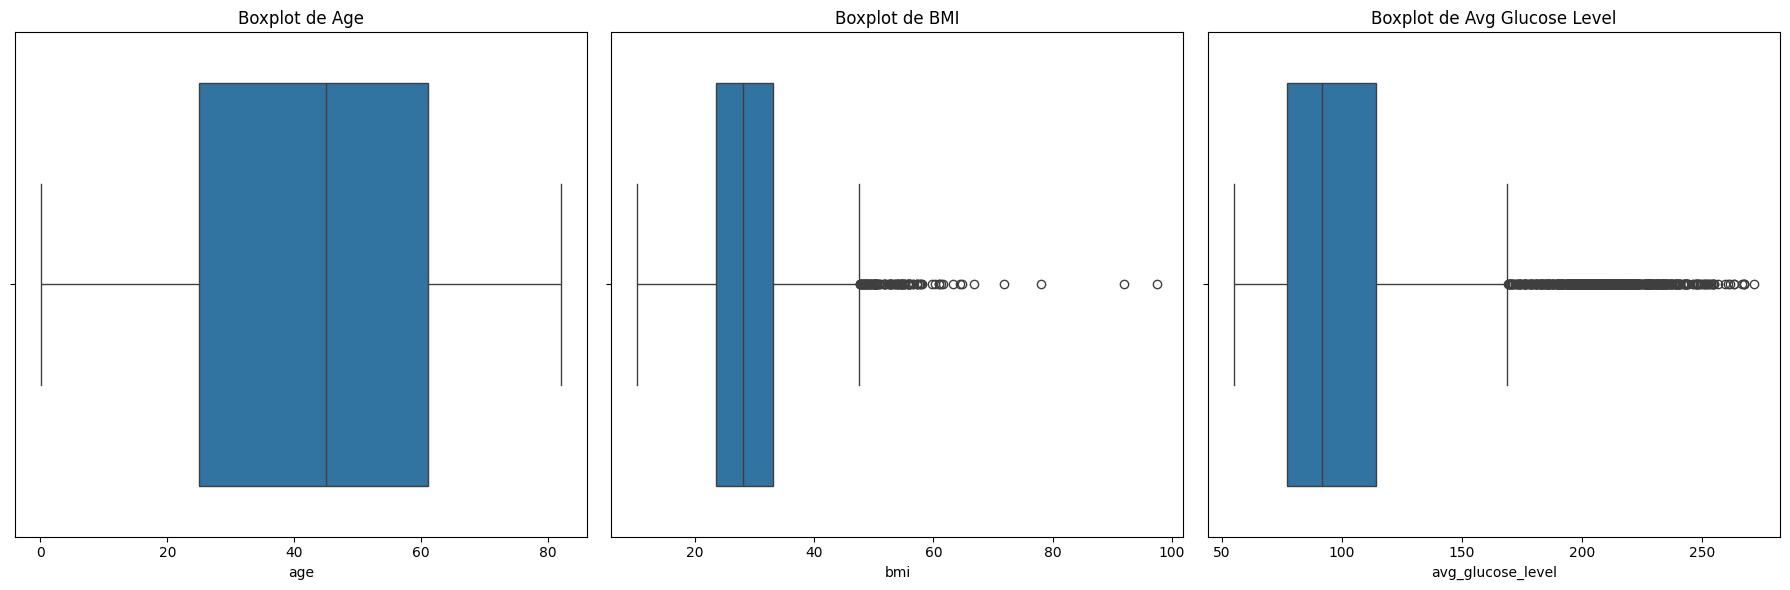

In [6]:
plt.figure(figsize=(18, 6))

# Boxplot para 'age'
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='age')
plt.title('Boxplot de Age')

# Boxplot para 'bmi'
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='bmi')
plt.title('Boxplot de BMI')

# Boxplot para 'avg_glucose_level'
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='avg_glucose_level')
plt.title('Boxplot de Avg Glucose Level')

plt.tight_layout()
plt.show()

In [7]:
variables_outliers = ['bmi', 'avg_glucose_level']

for variable in variables_outliers:
    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    
    # Calcular el IQR
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar los valores atípicos
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    print(f"Outliers en {variable}:\n", outliers[variable])

Outliers en bmi:
 21      48.9
113     56.6
254     50.1
258     54.6
270     60.9
        ... 
4858    47.6
4906    54.1
4952    56.6
5009    49.5
5057    47.6
Name: bmi, Length: 110, dtype: float64
Outliers en avg_glucose_level:
 0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64


En este caso utilizaremos el metodo de winsorize para tratar los outliers.

In [8]:
for variable in variables_outliers:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aplicar winsorización
    df[variable] = df[variable].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

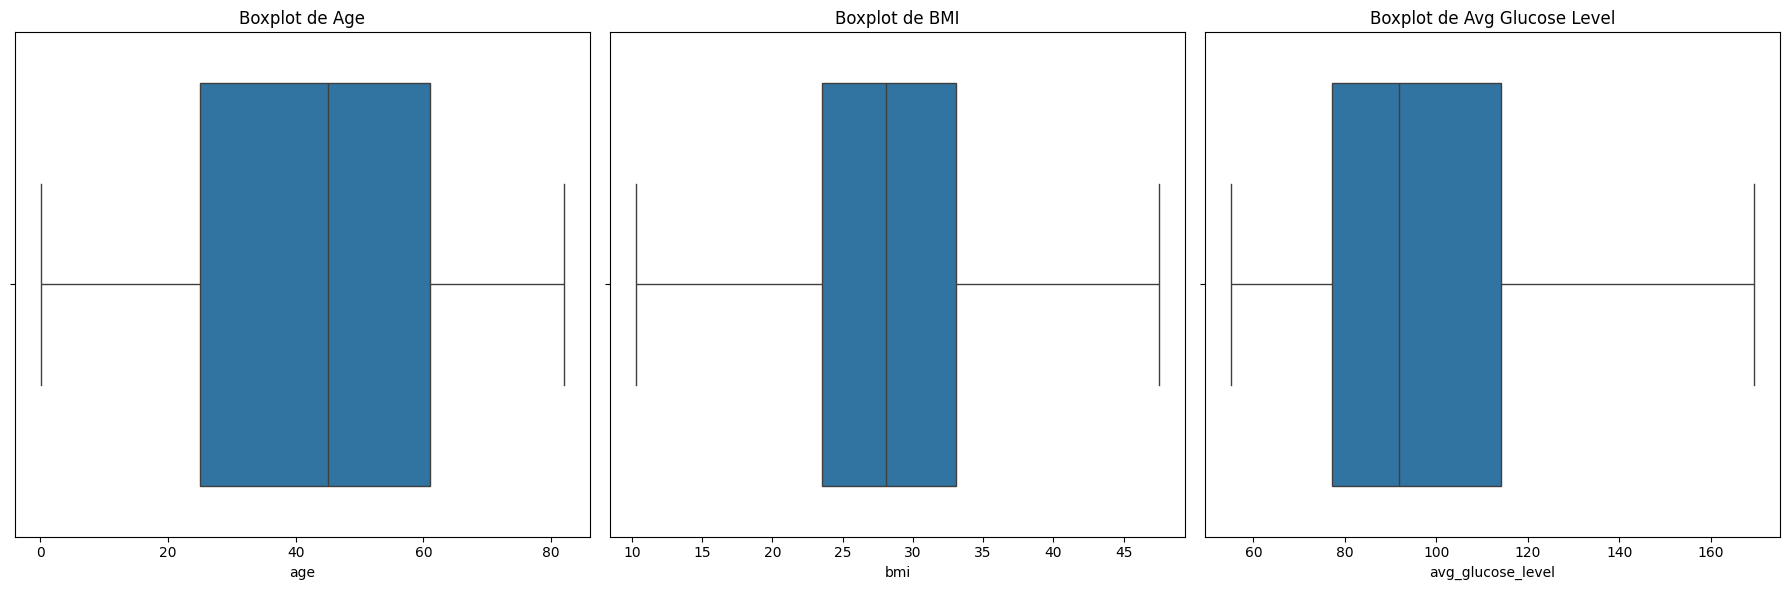

In [9]:
plt.figure(figsize=(18, 6))

# Boxplot para 'age'
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='age')
plt.title('Boxplot de Age')

# Boxplot para 'bmi'
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='bmi')
plt.title('Boxplot de BMI')

# Boxplot para 'avg_glucose_level'
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='avg_glucose_level')
plt.title('Boxplot de Avg Glucose Level')

plt.tight_layout()
plt.show()

Como se puede observar en los boxplots, las variables `avg_glucose_level` y `bmi` luego de aplicar winsorize, se ven menos afectadas por los outliers, mientras que la variable `age` no presenta outliers.

#### Manejo de valores faltantes

En el caso de la variable `bmi`, se reemplazarán los valores faltantes por la media de la columna.

In [10]:
# Reemplazar los valores faltantes en la columna 'bmi' por la media de la columna
df.fillna({'bmi': df['bmi'].mean()}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Transformación de variables categóricas

En este caso se utilizará el método de codificación one-hot para las variables categóricas `gender`, `Residence_type` y `smoking_status`. Para las variables `ever_married` y `work_type`, se utilizará el método de Label Encoding.

In [11]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding para 'gender', 'Residence_type' y 'smoking_status'
df = pd.get_dummies(df, columns=['gender', 'Residence_type', 'smoking_status'], drop_first=True)

# Label Encoding para 'ever_married' (Yes/No) y 'work_type' (sin orden)
le = LabelEncoder()
df['ever_married_encoded'] = le.fit_transform(df['ever_married'])
df['work_type_encoded'] = le.fit_transform(df['work_type'])

#### Escalado de variables numéricas

- Variables `bmi` y `avg_glucose_level`: Estas variables tienen valores atípicos importantes. En este caso, Robust Scaling es una buena opción porque reducirá el impacto de los valores atípicos sin eliminarlos.
- Variable `age`: Esta variable tiene una distribución relativamente uniforme y sin muchos valores atípicos. Puedes optar por Standard Scaling si quieres centrarla en torno a la media o Min-Max Scaling si prefieres escalarla a un rango específico.

In [12]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# Escalado de bmi y avg_glucose_level usando RobustScaler
robust_scaler = RobustScaler()
df[['bmi', 'avg_glucose_level']] = robust_scaler.fit_transform(df[['bmi', 'avg_glucose_level']])

# Escalado de age usando StandardScaler
standard_scaler = StandardScaler()
df[['age']] = standard_scaler.fit_transform(df[['age']])

#### Analisis de Correlacion

Vamos a realizar un analisis de correlacion entre las variables numericas para ver si existe alguna relacion entre ellas.

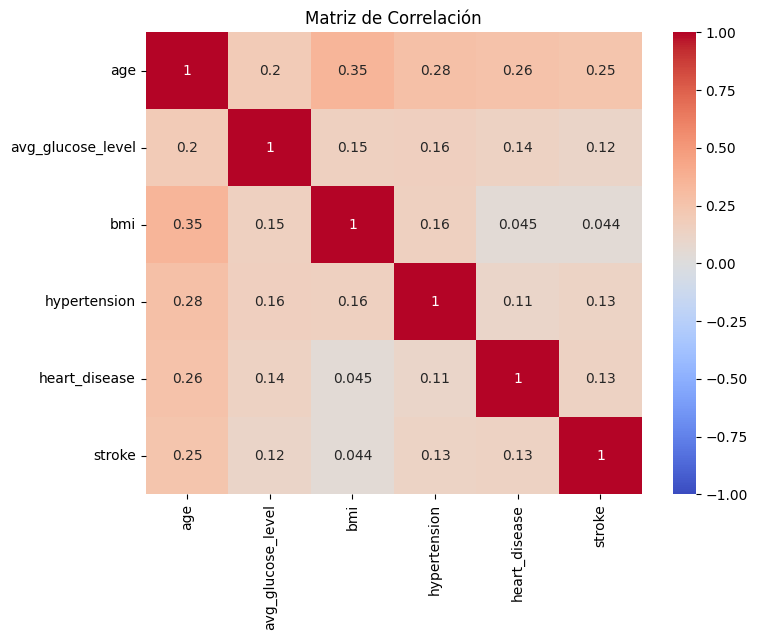

In [13]:
# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


##### Correlación con `stroke`
- **`age` y `stroke` (0.25)**: Existe una correlación positiva moderada. La edad es un factor de riesgo reconocido para accidentes cerebrovasculares, por lo que esta variable podría ser un buen predictor.
- **`hypertension` y `stroke` (0.13)**: Correlación positiva débil. La hipertensión incrementa levemente el riesgo de accidente cerebrovascular.
- **`heart_disease` y `stroke` (0.13)**: También una correlación positiva débil. La presencia de enfermedad cardíaca puede estar asociada con un ligero aumento en el riesgo de accidente cerebrovascular.
- **`avg_glucose_level` y `stroke` (0.12)**: Correlación muy débil. Aun así, esta variable podría ser relevante en combinación con otras variables.
- **`bmi` y `stroke` (0.044)**: Correlación prácticamente insignificante, lo que sugiere que el BMI no es un buen predictor de accidentes cerebrovasculares en este conjunto de datos.

##### Otras Correlaciones Relevantes
- **`age` y `bmi` (0.35)**: Existe una correlación positiva moderada, ya que el BMI tiende a aumentar con la edad.
- **`age` y `hypertension` (0.28)**: Correlación moderada; la presión arterial suele aumentar con la edad.
- **`age` y `heart_disease` (0.26)**: También una correlación positiva, ya que el riesgo de enfermedades cardíacas aumenta con la edad.

##### Conclusiones
- **Variables relevantes para el modelo**: `age`, `hypertension`, y `heart_disease` son las variables con mayor correlación positiva con `stroke`, aunque son relativamente bajas. Se recomienda incluirlas en el modelo debido a su relevancia clínica.
- **Variables menos relevantes**: `bmi` muestra una correlación muy baja con `stroke` y podría ser menos útil en el modelo. Sin embargo, se podría explorar su influencia combinada con otras variables o evaluar su importancia en el modelo.


### Definicion de Variables Dependientes e Independientes

En este apartado se definirán las variables dependientes e independientes para el modelo de clasificación. La variable dependiente será `stroke`, mientras que las variables independientes serán todas las demás columnas del conjunto de datos.

In [14]:
# Definir variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['stroke'])  # Elimina la columna objetivo del conjunto de características
y = df['stroke']  # Define la columna objetivo

# Eliminar columnas 'id', 'ever_married' y 'work_type'
X = df.drop(columns=['stroke', 'id', 'ever_married', 'work_type'])

En este caso, eliminamos la columna `id` ya que no aporta información relevante para el modelo. Además, se eliminan las columnas `gender` y `ever_married` debido a que ya aplicamos codificación one-hot y Label Encoding a estas variables por lo tanto no se necesitan para el modelo. Adicionalmente, eliminamos `stroke` de las variables independientes para evitar multicolinealidad.

### Entrenamientos de Modelos de Aprendizaje Supervisado

En este apartado se entrenarán varios modelos de clasificación para predecir si un paciente tiene riesgo de sufrir un accidente cerebrovascular. Además, se evaluará el rendimiento de cada modelo utilizando validación cruzada.

In [15]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from scikeras.wrappers import KerasClassifier
import time

def create_neural_network():
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

models = {
    'Random Forest': RandomForestClassifier(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Regresión Logística': LogisticRegression(),
    'Red Neuronal': KerasClassifier(model=create_neural_network, epochs=10, batch_size=32, verbose=0)
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
training_times = []

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Crear los "scorers" personalizados con zero_division=1
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, zero_division=1),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

results = {}

def results_of_model(model, X, y, scoring, kfold):
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    
    results = {
        'Accuracy': cv_results['test_accuracy'].mean(),
        'F1-Score': cv_results['test_f1'].mean(),
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'AUC-ROC': cv_results['test_roc_auc'].mean()
    }
    
    return results

def results_of_models(models, X, y, scoring, kfold):
    for model_name, model in models.items():
        results[model_name] = results_of_model(model, X, y, scoring, kfold)
    
    results_df = pd.DataFrame(results).T
    results_df = results_df.sort_values(by='Accuracy', ascending=False)

    return results_df


In [16]:
for model_name, model in models.items():
    start_time = time.time()  # Inicio del cronómetro
    cross_val_score(model, X, y, cv=kfold)  # Entrenamiento con validación cruzada
    end_time = time.time()  # Fin del cronómetro
    
    total_time = end_time - start_time
    
    training_times.append((model_name, total_time))

training_times_df = pd.DataFrame(training_times, columns=['Modelo', 'Tiempo de Entrenamiento Total (s)'])

# Mostrar la tabla
print(training_times_df)

/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-08 15:40:29.914243: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-08 15:40:29.914290: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-08 15:40:29.914303: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-08 15:40:29.914546: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-08 15:40:29.914568: I tensorflow/core/common_runtime/pl

                Modelo  Tiempo de Entrenamiento Total (s)
0        Random Forest                           3.163766
1    Árbol de Decisión                           0.106610
2  K-Nearest Neighbors                           0.299189
3    Gradient Boosting                           3.969809
4                  SVM                           1.904510
5  Regresión Logística                           0.549221
6         Red Neuronal                         159.171867


In [17]:
df_models_results = results_of_models(models, X, y, scoring, kfold)

print(df_models_results)

/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`inpu

                     Accuracy  F1-Score  Precision    Recall   AUC-ROC
SVM                  0.951272  0.000000   1.000000  0.000000  0.500000
Regresión Logística  0.951272  0.000000   1.000000  0.000000  0.500000
Red Neuronal         0.950881  0.000000   0.800000  0.000000  0.499796
Gradient Boosting    0.949902  0.015714   0.570000  0.009697  0.503931
Random Forest        0.949119  0.006897   0.250000  0.003704  0.500619
K-Nearest Neighbors  0.947945  0.014589   0.083333  0.008052  0.502073
Árbol de Decisión    0.909785  0.153260   0.139228  0.176185  0.561845


Estos resultados indican un problema de clases desbalanceadas. Aunque los modelos logran una alta precisión general (accuracy), tienen un desempeño muy pobre en la clase minoritaria (stroke=1), con F1-scores y recall extremadamente bajos. Los modelos tienden a favorecer la clase mayoritaria (stroke=0), lo cual es un indicativo de que el desbalance de clases está afectando su capacidad para predecir correctamente los casos de stroke=1. Para mejorar el rendimiento en la clase minoritaria.

A continuación realizaremos un grafico de la variable `stroke` para ver el desbalance de clases.

Distribución de Clases:
stroke
0    4861
1     249
Name: count, dtype: int64


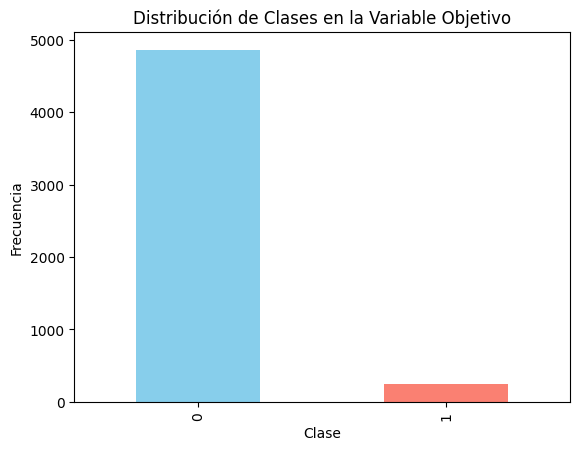

In [18]:
print("Distribución de Clases:")
print(y.value_counts())

y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribución de Clases en la Variable Objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

Como podemos observar en el grafico, la variable `stroke` esta desbalanceada, por lo que se procedera a balancear las clases utilizando la tecnica de SMOTE.

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_balanced, y_balanced = smote.fit_resample(X, y)

print("Distribución de Clases en y_balanced:")
print(y_balanced.value_counts())

Distribución de Clases en y_balanced:
stroke
1    4861
0    4861
Name: count, dtype: int64


Una vez balanceadas las clases, se procedera a entrenar nuevamente los modelos de clasificacion.

In [20]:
df_models_results_balanced = results_of_models(models, X_balanced, y_balanced, scoring, kfold)

print(df_models_results_balanced)

/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`inpu

                     Accuracy  F1-Score  Precision    Recall   AUC-ROC
Random Forest        0.942502  0.943863   0.921045  0.968013  0.942583
Árbol de Decisión    0.903313  0.905014   0.889836  0.920912  0.903408
K-Nearest Neighbors  0.890043  0.898980   0.830605  0.979882  0.890054
Gradient Boosting    0.860318  0.867372   0.825673  0.914009  0.860265
Red Neuronal         0.857130  0.864702   0.820125  0.915030  0.856829
SVM                  0.846123  0.855095   0.806926  0.909630  0.846055
Regresión Logística  0.804155  0.812782   0.777271  0.852081  0.804109


Tras balancear las clases, los modelos muestran un notable incremento en su capacidad para identificar la clase minoritaria (`stroke=1`). Random Forest destaca como el mejor modelo, con un F1-score de 0.94, alta precisión y recall, y el AUC-ROC más alto (0.938), lo que indica una buena capacidad para distinguir entre ambas clases. K-Nearest Neighbors y Árbol de Decisión también muestran buen desempeño, con altos F1-scores y recall, aunque con un poco más de falsos positivos.

En general, el balanceo ha mejorado significativamente las métricas de todos los modelos, ayudándoles a capturar los casos de `stroke=1` con mayor precisión y efectividad.

## División de Dataset en Entrenamiento y Prueba

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

## Mejora del Modelo de Regresion Logistica

### Optimizacion de Hiperparametros

En este apartado se optimizarán los hiperparámetros del modelo de Regresión Logística utilizando Grid Search y validación cruzada.

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
model = LogisticRegression(class_weight='balanced', max_iter=1000)
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
results = results_of_model(grid_search, X_balanced, y_balanced, scoring, kfold)
df_results = pd.DataFrame(results, index=['Logistic Regression Balanced'])
print(df_results)

                              Accuracy  F1-Score  Precision    Recall  \
Logistic Regression Balanced  0.804258  0.812969   0.777081  0.852658   

                               AUC-ROC  
Logistic Regression Balanced  0.871411  


A continuación se aplicará caraccteisticas polinomiales al modelo de regresion logistica.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(class_weight='balanced', max_iter=1000))
])

param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
results = results_of_model(grid_search, X_balanced, y_balanced, scoring, kfold)

df_results = pd.DataFrame(results, index=['Logistic Regression Balanced Polynomial'])

print(df_results)

                                         Accuracy  F1-Score  Precision  \
Logistic Regression Balanced Polynomial  0.827711  0.835866   0.796984   

                                           Recall   AUC-ROC  
Logistic Regression Balanced Polynomial  0.878933  0.827637  


Ahora se aplicará el penalizador elasticnet al modelo de regresion logistica.

In [23]:
# Pipeline con Elastic Net y escalado
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(penalty='elasticnet', solver='saga', class_weight='balanced', max_iter=1000))
])

param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__l1_ratio': [0.1, 0.5, 0.7]  # l1_ratio es el peso entre L1 y L2
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
results = results_of_model(grid_search, X_balanced, y_balanced, scoring, kfold)

df_results = pd.DataFrame(results, index=['Logistic Regression Balanced Elastic Net'])

print(df_results)

                                          Accuracy  F1-Score  Precision  \
Logistic Regression Balanced Elastic Net  0.804464  0.813174   0.777275   

                                            Recall   AUC-ROC  
Logistic Regression Balanced Elastic Net  0.852869  0.804357  


## Mejora modelo de Arbol de Decision

En este caso se va a aplicar tecnicas para hacer que el modelo de arbol de decision no se sobreajuste.

In [24]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', cv=50)
grid_search.fit(X_balanced, y_balanced)

print("Mejores parámetros para Decision Tree:")
print(grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)

# Use cross_validate to get other metrics
cv_results = cross_validate(grid_search.best_estimator_, X_balanced, y_balanced, cv=50, scoring=scoring)

print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("AUC-ROC: ", cv_results['test_roc_auc'].mean())

/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros para Decision Tree:
{'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
F1-Score:  0.8658187815704801
Accuracy:  0.8621882104150145
Precision:  0.8428830254182808
Recall:  0.8916810435514413
AUC-ROC:  0.8622196507468967


Mejores hiperparámetros: {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


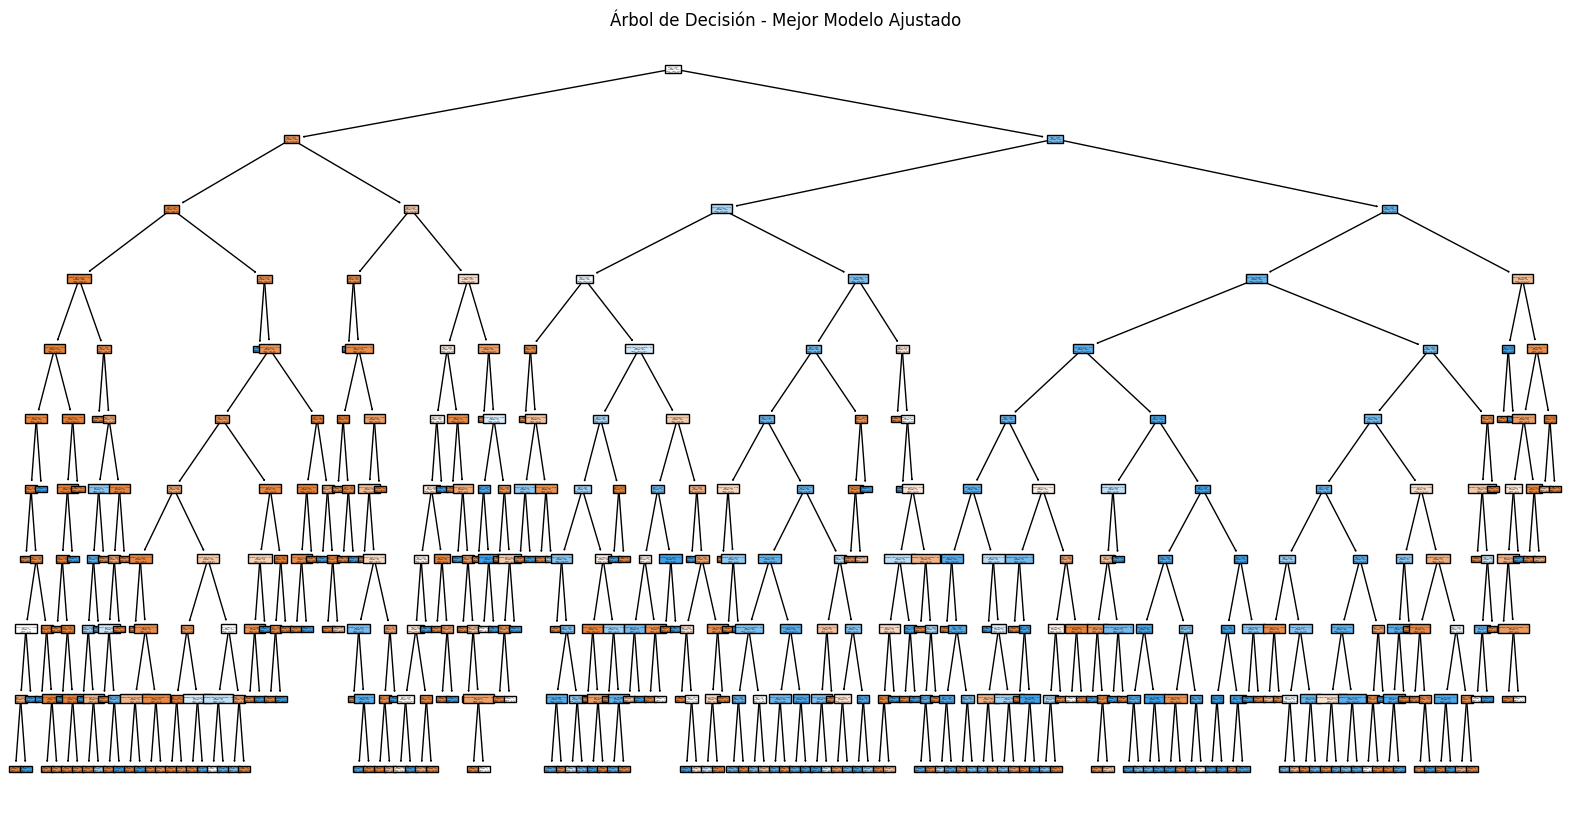

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_tree_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

plt.figure(figsize=(20, 10))  # Ajusta el tamaño del gráfico
plot_tree(best_tree_model, feature_names=X.columns, class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title("Árbol de Decisión - Mejor Modelo Ajustado")
plt.show()

En este caso estamos utilizando Bagging para mejorar el modelo de arbol de decision.

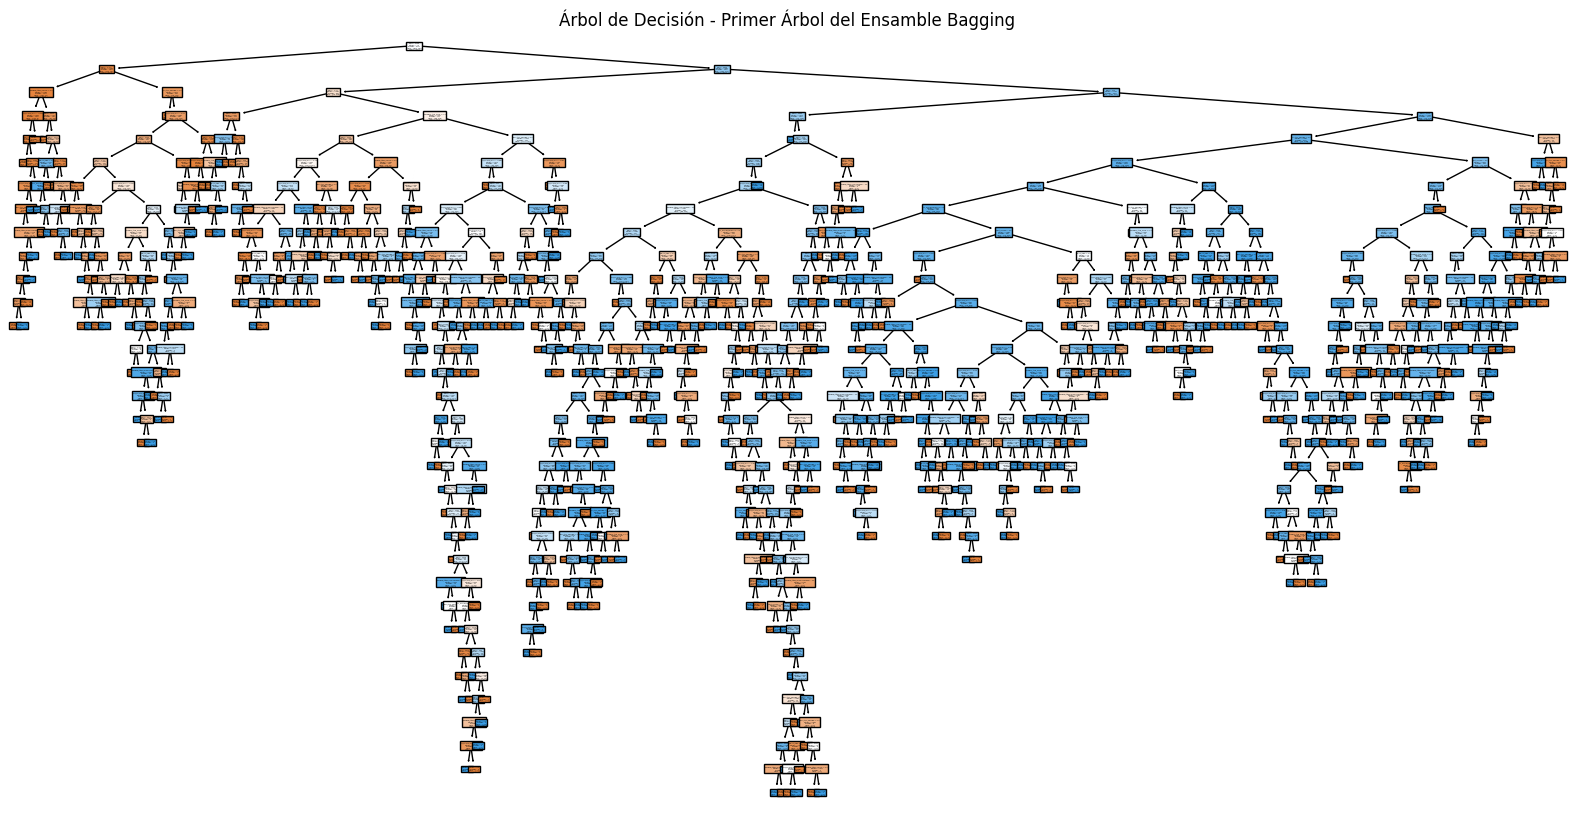

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=50)

model.fit(X_balanced, y_balanced)

print("Precisión del modelo Bagging:", model.score(X_balanced, y_balanced))

# Plot one of the trees in the BaggingClassifier
plt.figure(figsize=(20, 10))  # Ajusta el tamaño del gráfico
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title("Árbol de Decisión - Primer Árbol del Ensamble Bagging")
plt.show()


/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}


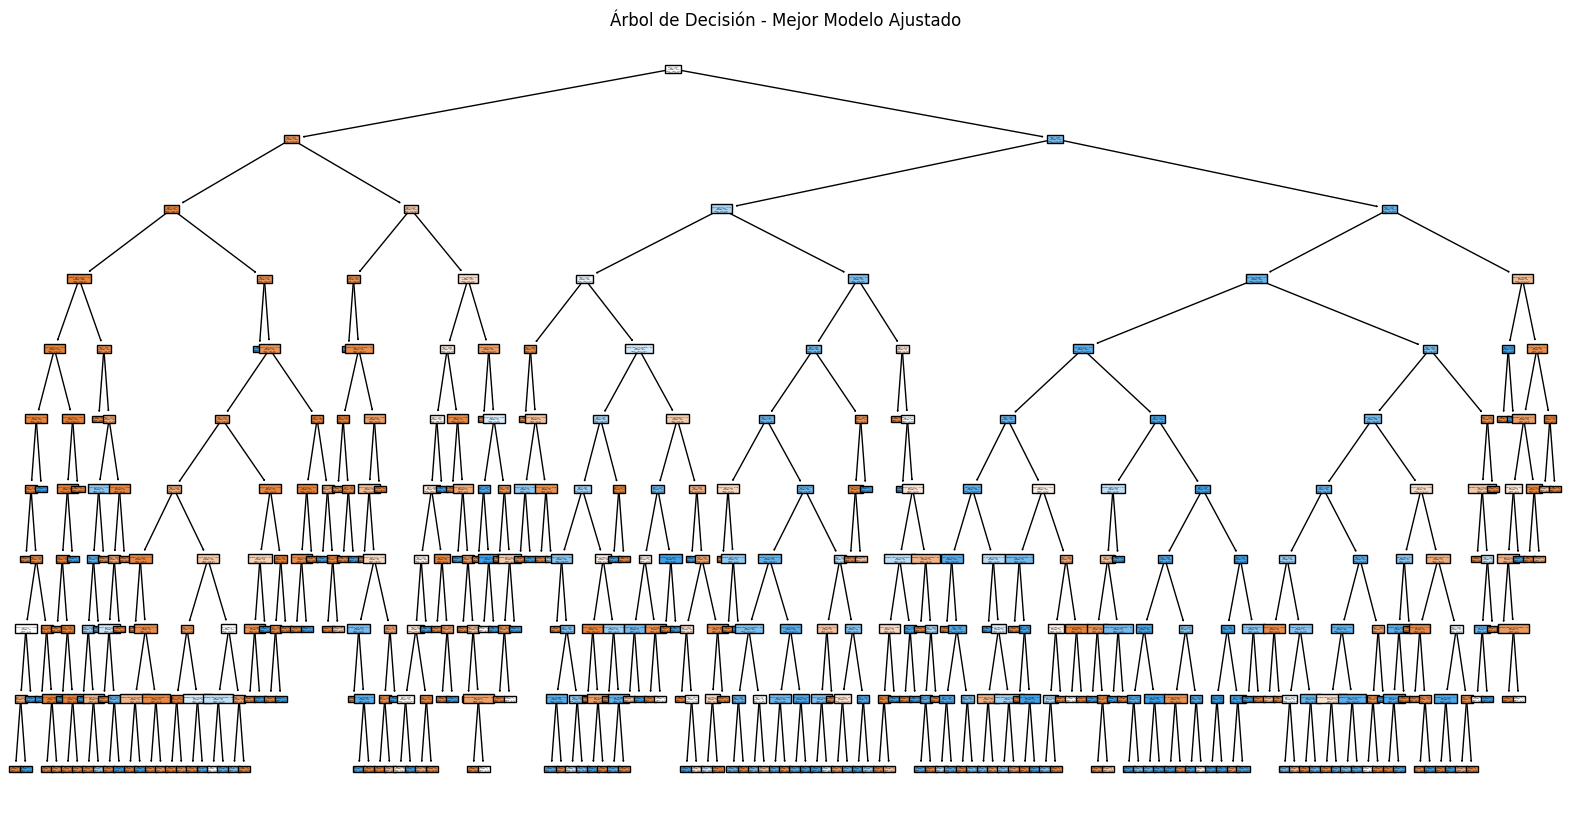

Accuracy:  0.8707062532398151
Precision:  0.8263036224448321
Recall:  0.938907921282022
AUC-ROC:  0.9376432124490057


In [53]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Definir una cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100],                          # Número de árboles en el ensamble
    'max_samples': [0.5, 0.8, 1.0],                         # Proporción de muestras por árbol
    'max_features': [0.5, 0.8, 1.0],                        # Proporción de características por árbol
    'estimator__max_depth': [3, 5, 7],                      # Profundidad máxima de cada árbol
    'estimator__min_samples_split': [2, 5, 10],             # Mínimo de muestras para dividir
    'estimator__min_samples_leaf': [1, 5, 10],              # Mínimo de muestras en cada hoja
    'estimator__criterion': ['gini', 'entropy']             # Criterio de división
}

# Configuración de GridSearchCV para encontrar el mejor modelo con validación cruzada
grid_search = GridSearchCV(bagging_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_balanced, y_balanced)

# Obtener el mejor modelo y los mejores hiperparámetros
best_bagging_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

plt.figure(figsize=(20, 10))  # Ajusta el tamaño del gráfico
plot_tree(best_tree_model, feature_names=X.columns, class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title("Árbol de Decisión - Mejor Modelo Ajustado")
plt.show()

cv_results = cross_validate(best_bagging_model, X_balanced, y_balanced, cv=5, scoring={
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
})

# Resultados de la validación cruzada
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("AUC-ROC: ", cv_results['test_roc_auc'].mean())

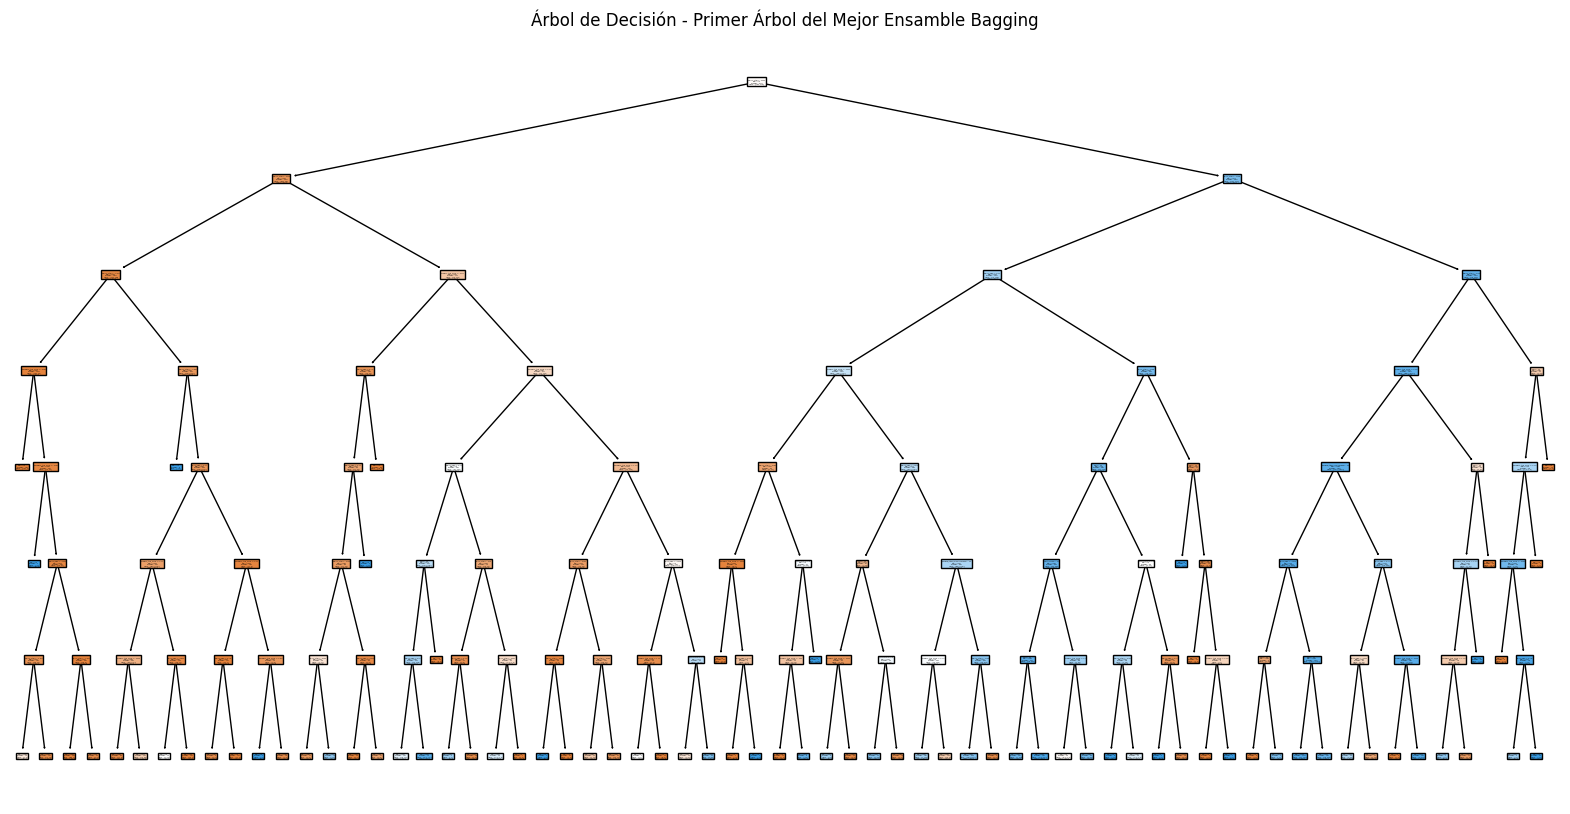

In [28]:
tree = best_bagging_model.estimators_[0]

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_balanced.columns, class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title("Árbol de Decisión - Primer Árbol del Mejor Ensamble Bagging")
plt.show()

In [29]:
rf_model = RandomForestClassifier(random_state=42)

# Definir una cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],                  # Número de árboles en el bosque
    'max_depth': [10, 15, 20, None],                      # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],                      # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 5, 10],                       # Mínimo de muestras en cada hoja
    'max_features': ['sqrt', 'log2', None],               # Máximo de características para cada división
    'bootstrap': [True],                                  # Usar muestreo con reemplazo
    'oob_score': [True]                                   # Evaluación de Out-of-Bag
}

# Configuración de GridSearchCV para encontrar el mejor modelo con validación cruzada
grid_search = GridSearchCV(rf_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_balanced, y_balanced)

# Obtener el mejor modelo y los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

cv_results = cross_validate(best_rf_model, X_balanced, y_balanced, cv=5, scoring={
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
})

# Resultados de la validación cruzada
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("AUC-ROC: ", cv_results['test_roc_auc'].mean())

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'oob_score': True}
Accuracy:  0.938697885260296
Precision:  0.91793864164539
Recall:  0.9635982219515393
AUC-ROC:  0.9874164608914258


In [30]:
rf_model = RandomForestClassifier(random_state=42, bootstrap=True, oob_score=True)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5]
}

grid_search = GridSearchCV(rf_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_balanced, y_balanced)

best_rf_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

cv_results = cross_validate(best_rf_model, X_balanced, y_balanced, cv=5, scoring={
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
})

print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("AUC-ROC: ", cv_results['test_roc_auc'].mean())

/Users/crxsx/Documents/universidad/mineria-de-datos/solemne-2-mineria-de-datos/env/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy:  0.9289251748177769
Precision:  0.9037300917157264
Recall:  0.9603011770477797
AUC-ROC:  0.9822589216714246


Tomamos los mejores hiperparametros obtenidos en el paso anterior y usamos algunos de ellos para entrenar el modelo de arbol de decision para afinar el modelo.

Mejores hiperparámetros después de la búsqueda refinada: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 250}


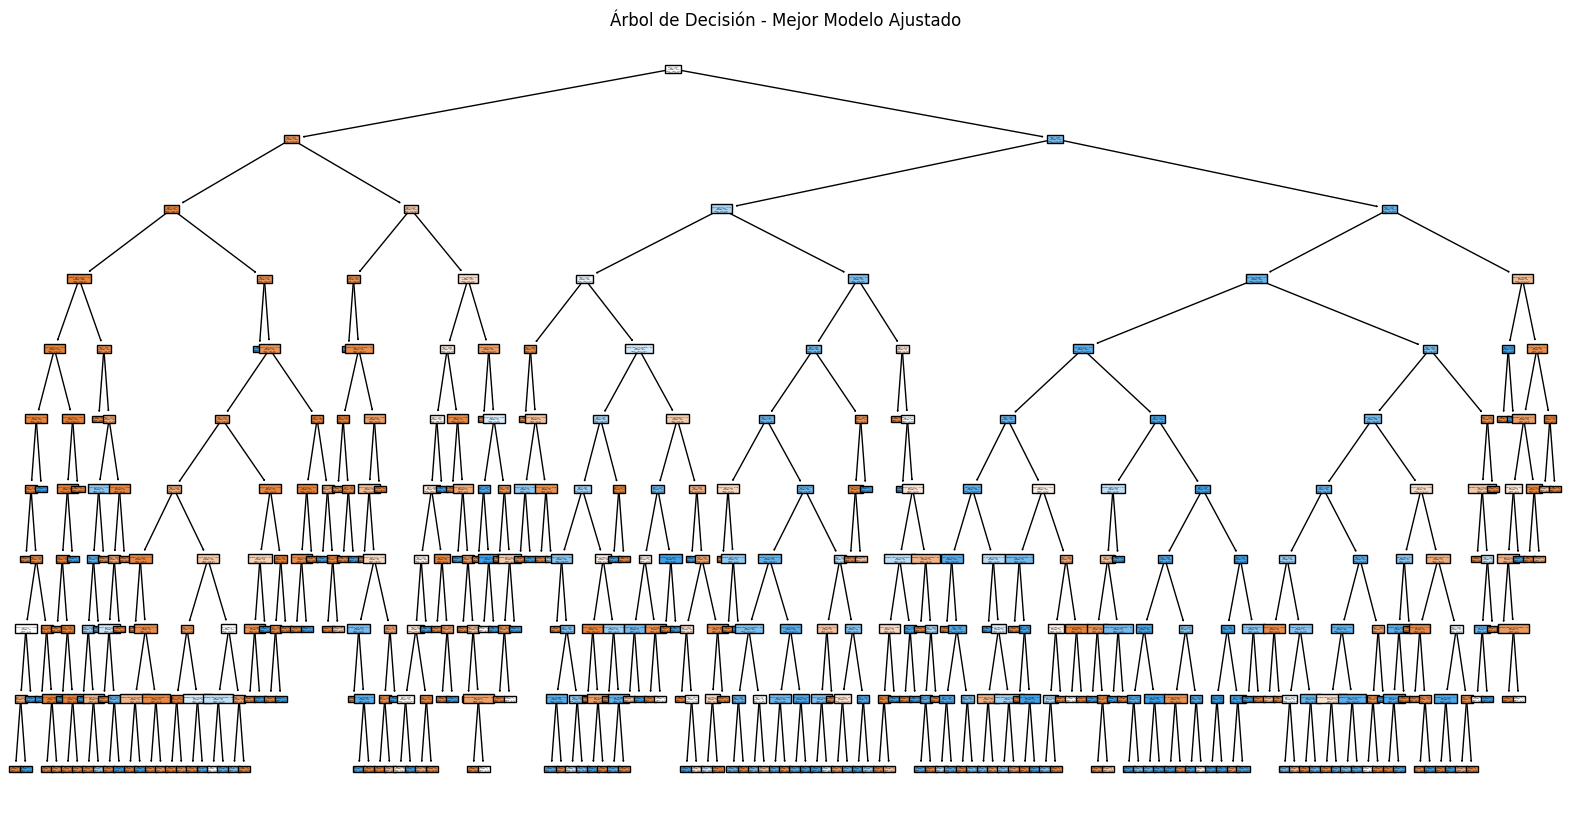

In [54]:
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None],  # Deja sin límite para probar, puedes añadir 30, 50 si deseas limitar
    'max_features': [0.5, 0.7],  # Valores cercanos a la mejor configuración anterior
    'min_samples_split': [4, 5, 6],  # Refinar en torno a 5
    'min_samples_leaf': [1, 2, 3]  # Refinar en torno a 2
}

grid_search = GridSearchCV(rf_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_balanced, y_balanced)

best_rf_model = grid_search.best_estimator_
print("Mejores hiperparámetros después de la búsqueda refinada:", grid_search.best_params_)

plt.figure(figsize=(20, 10))  # Ajusta el tamaño del gráfico
plot_tree(best_tree_model, feature_names=X.columns, class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title("Árbol de Decisión - Mejor Modelo Ajustado")
plt.show()

In [55]:

cv_results = cross_validate(best_rf_model, X_balanced, y_balanced, cv=5, scoring=scoring)

print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1-Score: ", cv_results['test_f1'].mean())
print("AUC-ROC: ", cv_results['test_roc_auc'].mean())

Accuracy:  0.9357139230061252
Precision:  0.9127661631746271
Recall:  0.9635925122335994
F1-Score:  0.9374370855111017
AUC-ROC:  0.9857494836756284


Stacking es una técnica de ensamblaje que combina múltiples modelos de aprendizaje automático para mejorar la precisión general. En este caso, se utilizará Stacking para combinar los modelos de Regresión Logística, Random Forest y Árbol de Decisión.

Accuracy:  0.9420916246151894
Precision:  0.9326327073211764
Recall:  0.9531029144938019
F1 Score:  0.9426547255874367
AUC-ROC:  0.942093943892505


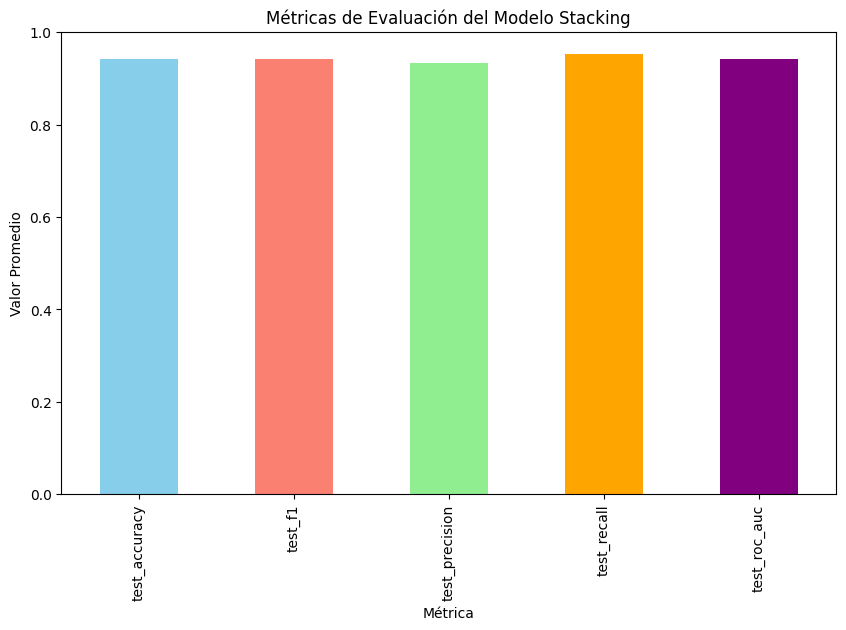

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(n_estimators=100))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

cv_results = cross_validate(stacking_model, X_balanced, y_balanced, cv=5, scoring=scoring)

cv_results_df = pd.DataFrame(cv_results)

print("Accuracy: ", cv_results_df['test_accuracy'].mean())
print("Precision: ", cv_results_df['test_precision'].mean())
print("Recall: ", cv_results_df['test_recall'].mean())
print("F1 Score: ", cv_results_df['test_f1'].mean())
print("AUC-ROC: ", cv_results_df['test_roc_auc'].mean())

metrics = ['test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc']
cv_results_df[metrics].mean().plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.title('Métricas de Evaluación del Modelo Stacking')
plt.ylabel('Valor Promedio')
plt.xlabel('Métrica')
plt.ylim(0, 1)
plt.show()

## Mejora de la Red Neuronal

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1 Score: 0.8978
Accuracy: 0.8915
Precision: 0.8466
Recall: 0.9557
AUC-ROC: 0.9432


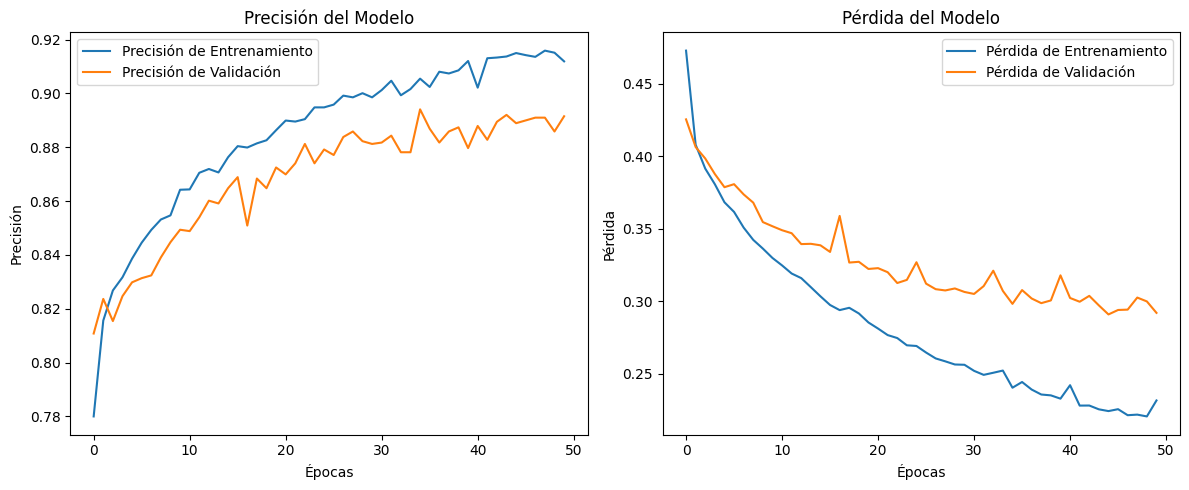

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Definir el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con validación
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Función para graficar la precisión y pérdida del entrenamiento
def training_accuracy_loss(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Precisión del Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Pérdida del Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Realizar predicciones en el conjunto de prueba
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Función para calcular y mostrar métricas
def metrics(y_test, y_pred, y_pred_prob):
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)  # AUC requiere probabilidades
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

# Calcular métricas y graficar
metrics(y_test, y_test_pred, y_test_pred_prob)
training_accuracy_loss(history)

En este caso se le agregara dropout a la red neuronal para evitar el sobreajuste.

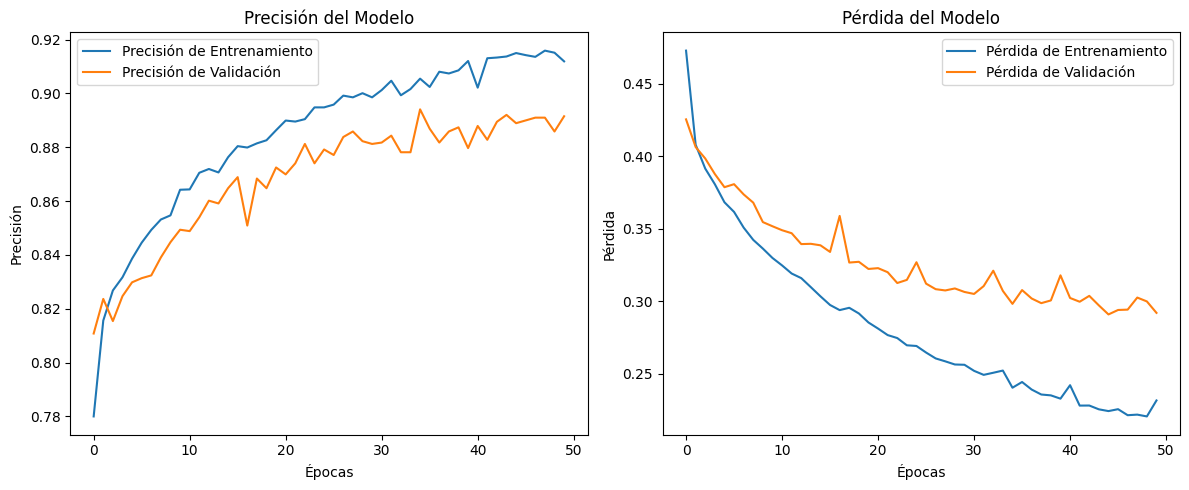

F1 Score: 0.8832
Accuracy: 0.8776
Precision: 0.8427
Recall: 0.9278
AUC-ROC: 0.8778


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model = KerasClassifier(model=model, epochs=50, batch_size=64, verbose=0)
model.fit(X_train, y_train)

training_accuracy_loss(history)

y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

metrics(y_test, y_test_pred, y_test_pred_prob)

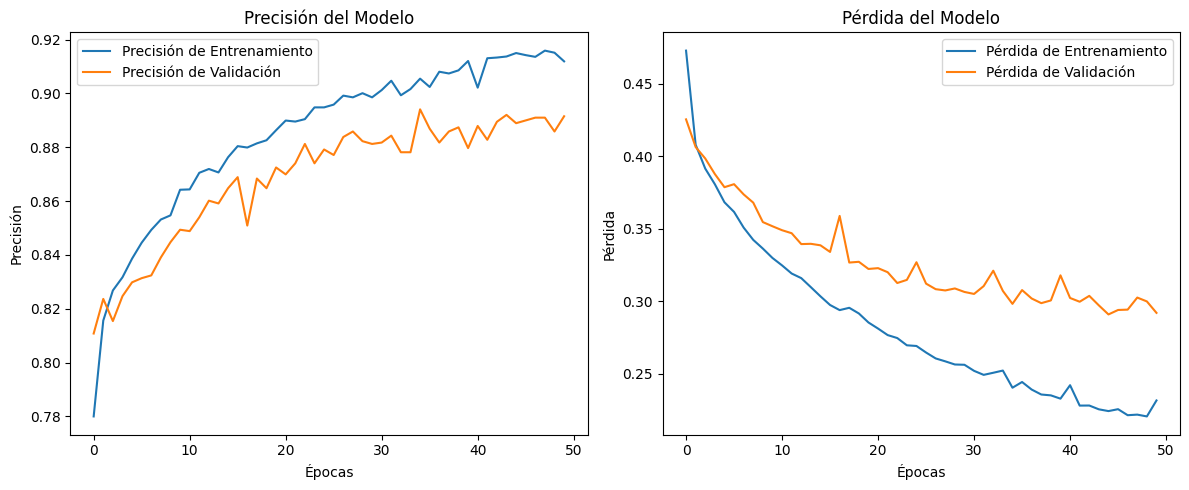

F1 Score: 0.8657
Accuracy: 0.8576
Precision: 0.8170
Recall: 0.9206
AUC-ROC: 0.8577


In [68]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # Capa adicional
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model = KerasClassifier(model=model, epochs=50, batch_size=64, verbose=0)

model.fit(X_train, y_train)

training_accuracy_loss(history)

y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

metrics(y_test, y_test_pred, y_test_pred_prob)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4984 - loss: 1.9746 - val_accuracy: 0.7063 - val_loss: 1.5378
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5912 - loss: 1.4682 - val_accuracy: 0.7674 - val_loss: 1.1781
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6830 - loss: 1.1542 - val_accuracy: 0.7879 - val_loss: 0.9279
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7344 - loss: 0.9493 - val_accuracy: 0.7918 - val_loss: 0.7838
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7564 - loss: 0.8170 - val_accuracy: 0.8001 - val_loss: 0.6924
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7748 - loss: 0.7266 - val_accuracy: 0.7969 - val_loss: 0.6330
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7847 - loss: 0.6572 - val_accuracy: 0.8066 - val_loss: 0.5934
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7853 - loss: 0.6280 - val_accuracy: 0.

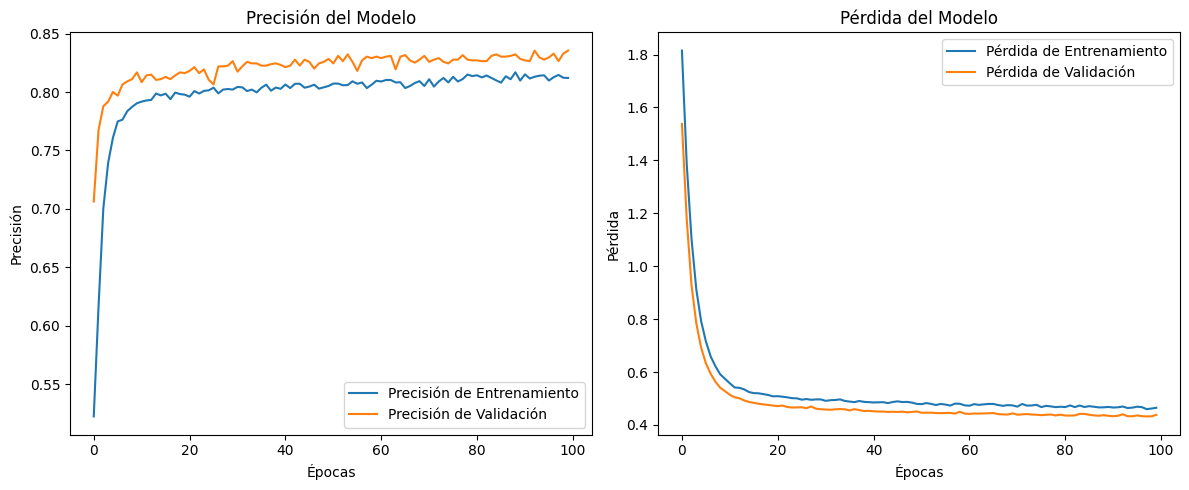

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
F1 Score: 0.8284
Accuracy: 0.8139
Precision: 0.7667
Recall: 0.9010
AUC-ROC: 0.8933


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Definir el modelo con mayor regularización y Dropout
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Usar una tasa de aprendizaje más baja con un programador de decaimiento
initial_learning_rate = 0.0005
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)

model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

training_accuracy_loss(history)

y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

metrics(y_test, y_test_pred, y_test_pred_prob)

En el siguiente modelo se ajustaron las capas densas y se les aplico un numero mayor de neuronas.

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5693 - loss: 1.2954 - val_accuracy: 0.7846 - val_loss: 0.8265
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7695 - loss: 0.8052 - val_accuracy: 0.7995 - val_loss: 0.6545
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7961 - loss: 0.6508 - val_accuracy: 0.8062 - val_loss: 0.5733
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8025 - loss: 0.5735 - val_accuracy: 0.8093 - val_loss: 0.5286
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7942 - loss: 0.5486 - val_accuracy: 0.8103 - val_loss: 0.5053
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8157 - loss: 0.5112 - val_accuracy: 0.8123 - val_loss: 0.4908
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8073 - loss: 0.5044 - val_accuracy: 0.8139 - val_loss: 0.4801
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8132 - loss: 0.4876 - 

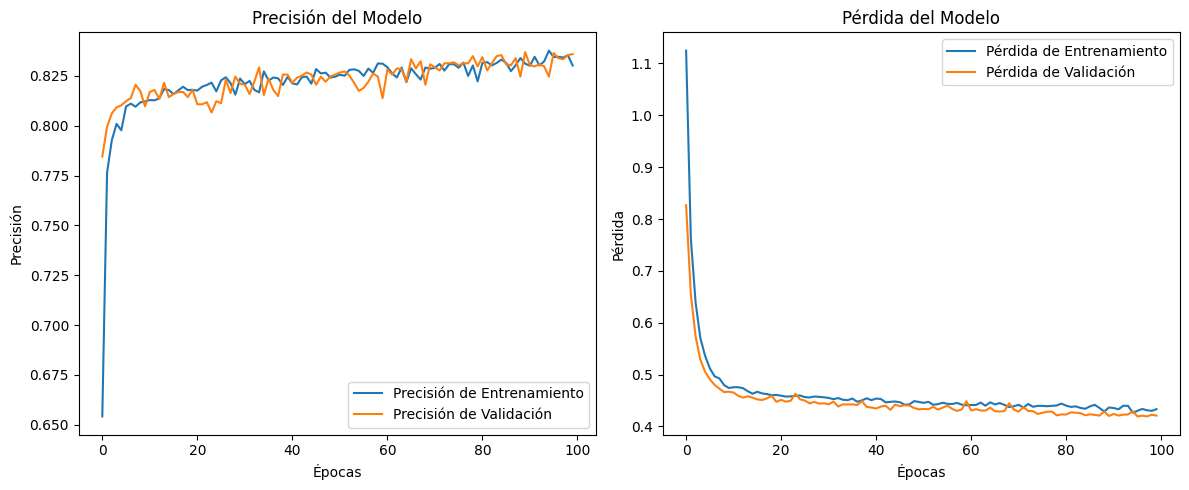

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1 Score: 0.8481
Accuracy: 0.8365
Precision: 0.7900
Recall: 0.9155
AUC-ROC: 0.9089


In [70]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)

model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

training_accuracy_loss(history)

y_test_pred_prob = model.predict(X_test)

y_test_pred = (y_test_pred_prob > 0.5).astype(int)

metrics(y_test, y_test_pred, y_test_pred_prob)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6791 - loss: 1.1867 - val_accuracy: 0.7805 - val_loss: 0.7460
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7929 - loss: 0.7081 - val_accuracy: 0.8057 - val_loss: 0.5900
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7981 - loss: 0.5821 - val_accuracy: 0.8067 - val_loss: 0.5300
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8009 - loss: 0.5344 - val_accuracy: 0.8021 - val_loss: 0.5075
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8128 - loss: 0.5018 - val_accuracy: 0.8118 - val_loss: 0.4899
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8204 - loss: 0.4783 - val_accuracy: 0.8170 - val_loss: 0.4764
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8209 - loss: 0.4695 - val_accuracy: 0.8036 - val_loss: 0.4701
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8154 - loss: 0.4737 - 

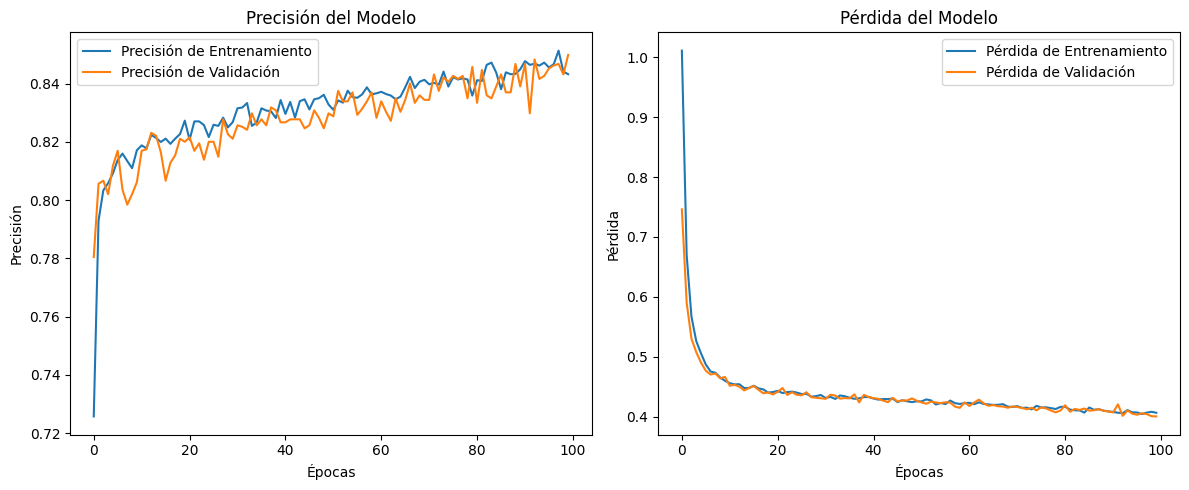

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1 Score: 0.8577
Accuracy: 0.8499
Precision: 0.8133
Recall: 0.9072
AUC-ROC: 0.9167


In [71]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.95, staircase=True
)

model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,  # Prueba 64 o 128
    callbacks=[early_stopping],
    verbose=1
)

training_accuracy_loss(history)

y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

metrics(y_test, y_test_pred, y_test_pred_prob)

Los hiperparámetros clave de este modelo incluyen el número de neuronas en cada capa oculta (128, 64, 32), el valor de regularización L2 (0.005), y el Dropout (0.3) para controlar el sobreajuste. También puedes ajustar la tasa de aprendizaje inicial (0.001), el decaimiento de la tasa (0.95), y el número de pasos para el decaimiento (10000). En cuanto al entrenamiento, el tamaño del batch (64) y el número de épocas con paciencia en EarlyStopping (25) pueden probarse con diferentes valores para mejorar la convergencia y generalización del modelo. Experimentar con estos hiperparámetros puede ayudar a optimizar el rendimiento y la precisión del modelo.